# Sentiment Analysis Tutorial

#### There are mainly two approaches for performing sentiment analysis : <br>
* Lexicon-based: Count number of positive and negative words in a given text and the larger count will be the sentiment of text <br>
* Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral responses <br>

#### Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity. <br>
A corpus' sentiment is the average of these.

### Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
### Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

* Import the nltk module

In [1]:
import nltk

* Examples of 4 sentences we would like to do analyse sentiments below :

In [2]:
sent_1 = 'I am enjoying doing the NLP assignments.'
sent_2 = 'I am not enjoying doing the NLP assignments.'  # Negation of sentence 1
sent_3 = 'Sentiment analysis is interesting but I am finding it a bit challenging.'
sent_4 = "I completed last week's task on time but this week's task has got delayed and is only partially complete"

* Import Pandas and Seaborn

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
sns.set(rc={'figure.figsize':(30,1)})

Create a Function that will generate a heatmap in order to give us a graphical view of the sentiment score of words

In [5]:
def visualise_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# Vader

* Vader is part of NLTK's pre trained sentiment analyzer library <br>
* Vader sentiment analysis tool uses a Bag of Words approach (a lookup table of positive and negative words) with some simple heuristics 

* Download the Vader lexicon

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xps\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

* Import SentimentIntensityAnalyzer module from NLTK Vader

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

* Create an object

In [8]:
vader_sentiment_analyzer = SentimentIntensityAnalyzer()

####  Let's check the polarity scores of each of the sentences

### 1st sentence : 'I am enjoying doing the NLP assignments.'

In [9]:
vader_sentiment_analyzer.polarity_scores(sent_1)

{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5267}

### Visualisation of 1st sentence

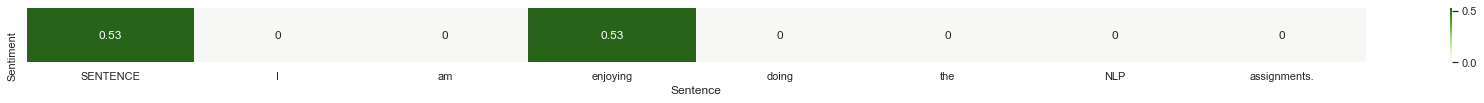

In [10]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sent_1.split(),
    "Sentiment":[vader_sentiment_analyzer.polarity_scores(sent_1)["compound"]] + [vader_sentiment_analyzer.polarity_scores(word)["compound"] for word in sent_1.split()]
})

As we see from above, the sentiment is positive with no negative score.

Next let's check the negation of the 1st sentence

### 2nd sentence : 'I am not enjoying doing the NLP assignments.'

In [11]:
vader_sentiment_analyzer.polarity_scores(sent_2)

{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.4168}

### Visualisation of 2nd sentence

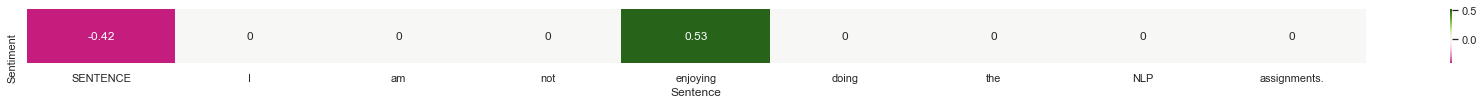

In [12]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sent_2.split(),
    "Sentiment":[vader_sentiment_analyzer.polarity_scores(sent_2)["compound"]] + [vader_sentiment_analyzer.polarity_scores(word)["compound"] for word in sent_2.split()]
})

We see from above the negation is identified, i.e. the sentiment is negative with no positive score

* The advantage of Vader sentiment analysis approach is that sentences containing negated positive words (e.g. “not enjoying”, “not good”) will still receive a negative sentence sentiment (due to the heuristics to flip the sentiment of the word following a negation). Some simpler sentiment analysis tools will just take the average of the sentiments of the words and would miss subtle details like this

### 3rd sentence : 'Sentiment analysis is interesting but I am finding it a bit challenging.'

In [13]:
vader_sentiment_analyzer.polarity_scores(sent_3)

{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.4118}

### Visualisation of 3rd sentence

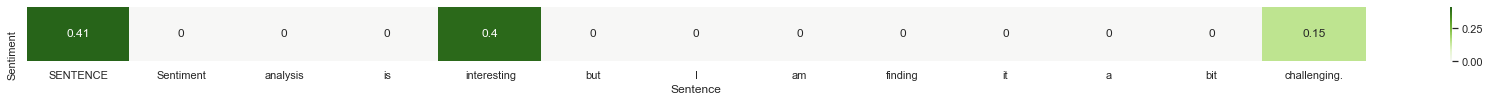

In [14]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sent_3.split(),
    "Sentiment":[vader_sentiment_analyzer.polarity_scores(sent_3)["compound"]] + [vader_sentiment_analyzer.polarity_scores(word)["compound"] for word in sent_3.split()]
})

### 4th sentence : "I completed last week's task on time but this week's task has got delayed and is only partially complete"

In [15]:
vader_sentiment_analyzer.polarity_scores(sent_4)

{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.3291}

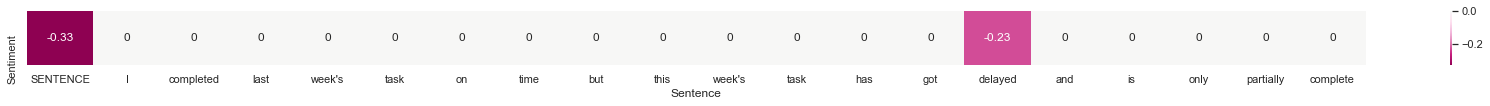

In [16]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sent_4.split(),
    "Sentiment":[vader_sentiment_analyzer.polarity_scores(sent_4)["compound"]] + [vader_sentiment_analyzer.polarity_scores(word)["compound"] for word in sent_4.split()]
})

#### Now, let's analyse a paragraph which has Sentences 1, 3 and 4 together to get the sentiment

In [17]:
para_1 = sent_1 + sent_3 + sent_4

In [18]:
para_1

"I am enjoying doing the NLP assignments.Sentiment analysis is interesting but I am finding it a bit challenging.I completed last week's task on time but this week's task has got delayed and is only partially complete"

In [19]:
vader_sentiment_analyzer.polarity_scores(para_1)

{'neg': 0.065, 'neu': 0.824, 'pos': 0.111, 'compound': 0.1779}

### Visualisation

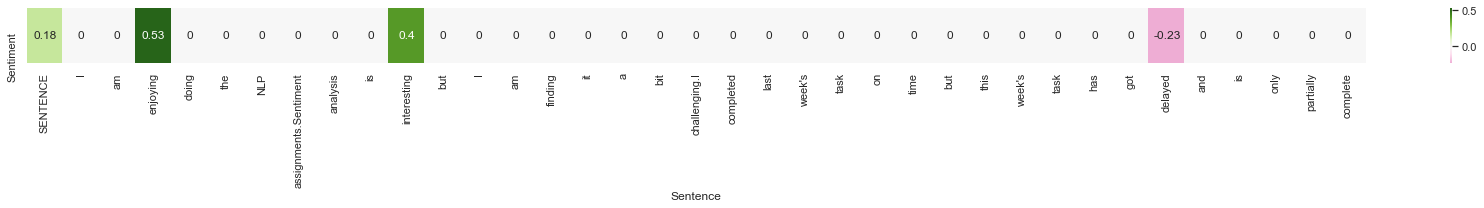

In [20]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + para_1.split(),
    "Sentiment":[vader_sentiment_analyzer.polarity_scores(para_1)["compound"]] + [vader_sentiment_analyzer.polarity_scores(word)["compound"] for word in para_1.split()]
})

From above, the sentiment is slightly positive

Now let's analyze the sentiment of the paragraph with negation

In [21]:
para_2 = sent_2 + sent_3 + sent_4

In [22]:
para_2

"I am not enjoying doing the NLP assignments.Sentiment analysis is interesting but I am finding it a bit challenging.I completed last week's task on time but this week's task has got delayed and is only partially complete"

In [23]:
vader_sentiment_analyzer.polarity_scores(para_2)

{'neg': 0.114, 'neu': 0.836, 'pos': 0.05, 'compound': -0.3374}

### Visualisation

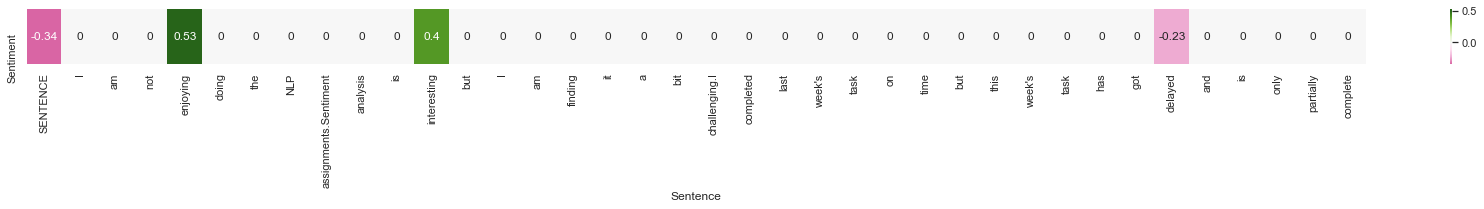

In [24]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + para_2.split(),
    "Sentiment":[vader_sentiment_analyzer.polarity_scores(para_2)["compound"]] + [vader_sentiment_analyzer.polarity_scores(word)["compound"] for word in para_2.split()]
})

As seen from above, the negation in the paragraph is accurately identified and overall the sentiment is negative

* The disadvantage of Vader Sentiment Analyzer approach is that Out of Vocabulary (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).

# TextBlob

* TextBlob’s Sentiment Analysis works in a similar way to NLTK — using a Bag of Words classifier <br>
* The advantage is that TextBlob includes Subjectivity Analysis too (how factual/opinionated a piece of text is)

Import TextBlob module

In [25]:
from textblob import TextBlob

### 1st sentence : 'I am enjoying doing the NLP assignments.'

In [26]:
TextBlob(sent_1).sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

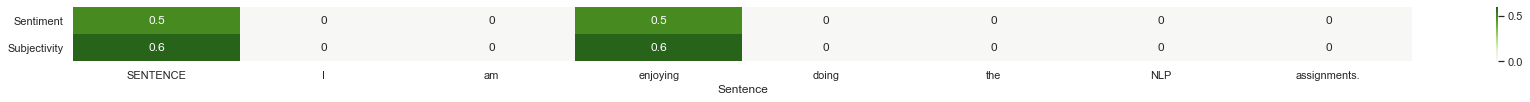

In [27]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sent_1.split(),
      "Sentiment":[TextBlob(sent_1).polarity] + [TextBlob(word).polarity for word in sent_1.split()],
      "Subjectivity":[TextBlob(sent_1).subjectivity] + [TextBlob(word).subjectivity for word in sent_1.split()],
})

### 2nd sentence : 'I am not enjoying doing the NLP assignments.'

In [28]:
TextBlob(sent_2).sentiment

Sentiment(polarity=-0.25, subjectivity=0.6)

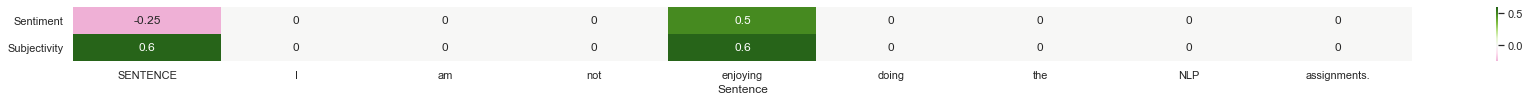

In [29]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sent_2.split(),
      "Sentiment":[TextBlob(sent_2).polarity] + [TextBlob(word).polarity for word in sent_2.split()],
      "Subjectivity":[TextBlob(sent_2).subjectivity] + [TextBlob(word).subjectivity for word in sent_2.split()],
})

### 3rd sentence : 'Sentiment analysis is interesting but I am finding it a bit challenging.'

In [30]:
TextBlob(sent_3).sentiment

Sentiment(polarity=0.5, subjectivity=0.75)

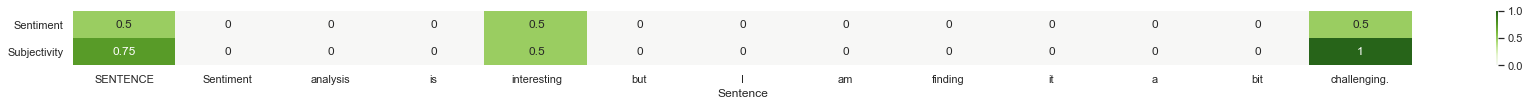

In [31]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sent_3.split(),
      "Sentiment":[TextBlob(sent_3).polarity] + [TextBlob(word).polarity for word in sent_3.split()],
      "Subjectivity":[TextBlob(sent_3).subjectivity] + [TextBlob(word).subjectivity for word in sent_3.split()],
})

### 4th sentence : "I completed last week's task on time but this week's task has got delayed and is only partially complete"

In [32]:
TextBlob(sent_4).sentiment

Sentiment(polarity=0.03333333333333333, subjectivity=0.48888888888888893)

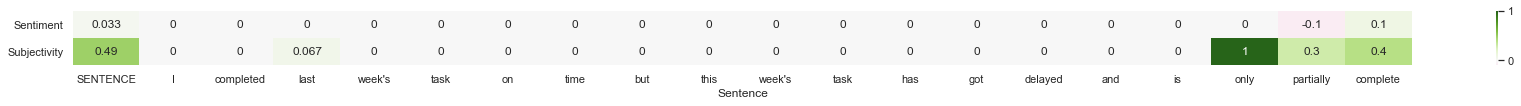

In [33]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sent_4.split(),
      "Sentiment":[TextBlob(sent_4).polarity] + [TextBlob(word).polarity for word in sent_4.split()],
      "Subjectivity":[TextBlob(sent_4).subjectivity] + [TextBlob(word).subjectivity for word in sent_4.split()],
})

#### Now, let's analyse a paragraph which has Sentences 1, 3 and 4 together to get the sentiment

In [34]:
para_1

"I am enjoying doing the NLP assignments.Sentiment analysis is interesting but I am finding it a bit challenging.I completed last week's task on time but this week's task has got delayed and is only partially complete"

In [35]:
TextBlob(para_1).sentiment

Sentiment(polarity=0.22000000000000003, subjectivity=0.5133333333333334)

### Visualisation

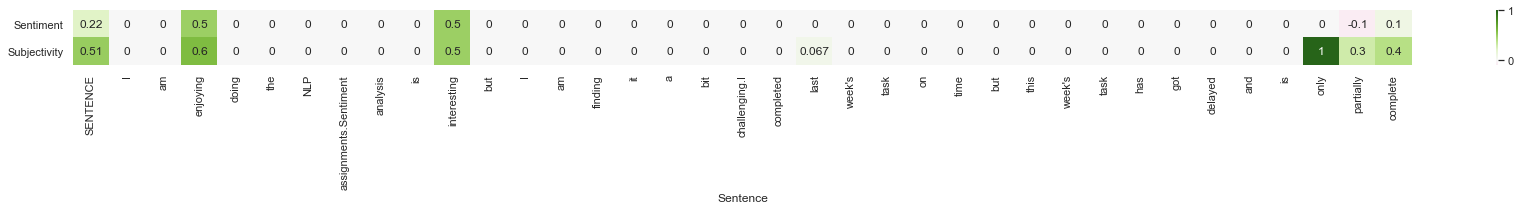

In [36]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + para_1.split(),
      "Sentiment":[TextBlob(para_1).polarity] + [TextBlob(word).polarity for word in para_1.split()],
      "Subjectivity":[TextBlob(para_1).subjectivity] + [TextBlob(word).subjectivity for word in para_1.split()],
})

#### From above we see that the sentiment of the paragraph 1  with TextBlob is positive with score = 0.22 which is similar to the result we got for Vader where score is 0.18

#### Now let's analyze the sentiment of the paragraph with negation

In [37]:
para_2

"I am not enjoying doing the NLP assignments.Sentiment analysis is interesting but I am finding it a bit challenging.I completed last week's task on time but this week's task has got delayed and is only partially complete"

In [38]:
TextBlob(para_2).sentiment

Sentiment(polarity=0.06999999999999999, subjectivity=0.5133333333333334)

### Visualisation

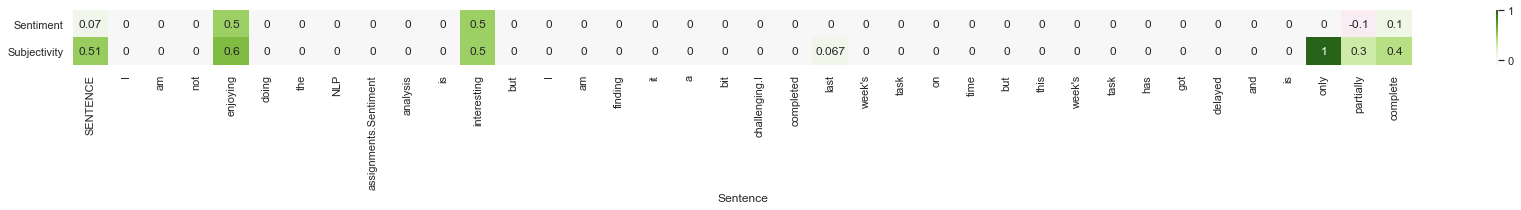

In [39]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + para_2.split(),
      "Sentiment":[TextBlob(para_2).polarity] + [TextBlob(word).polarity for word in para_2.split()],
      "Subjectivity":[TextBlob(para_2).subjectivity] + [TextBlob(word).subjectivity for word in para_2.split()],
})

##### From above, we get overall sentiment of Paragraph 2 with TextBlob as nearly positive to neutral with score of 0.07, which is interesting as the overall sentiment of the same paragraph with Vader is -0.34 which is more accurate

## ________End of Tutorial_____

In [ ]:
'''
from textblob.sentiments import NaiveBayesAnalyzer
TextBlob(sent_1,analyzer=NaiveBayesAnalyzer()).sentiment

import flair

flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

s1_obj = flair.data.Sentence(s_1)
flair_sentiment.predict(s1_obj)
total_senti = s1_obj.labels
total_senti
tokens = [token.text for token in s1_obj.tokens]
ss = [flair.data.Sentence(s1_obj) for s1_obj in tokens]
[flair_sentiment.predict(s1) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})
'''